In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset using seaborn
df = sns.load_dataset('titanic')

# Display the first few rows to understand the structure
print("First 5 Rows:")
print(df.head())

# Get a concise summary of the dataframe
print("\nData Info:")
df.info()

# Get a statistical summary of numerical features
print("\nNumerical Summary:")
print(df.describe())

First 5 Rows:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0

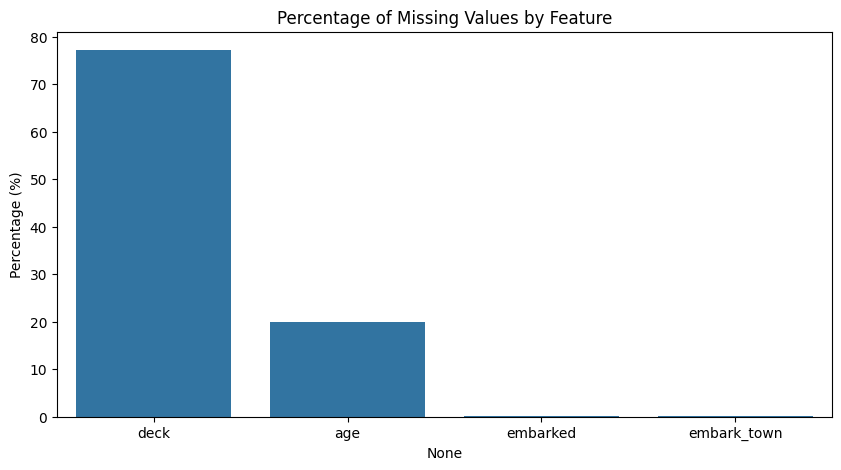

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
dtype: float64


In [4]:
# Calculate and visualize the percentage of missing values
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=missing_percent.index, y=missing_percent)
plt.title('Percentage of Missing Values by Feature')
plt.ylabel('Percentage (%)')
plt.show()

print(missing_percent)

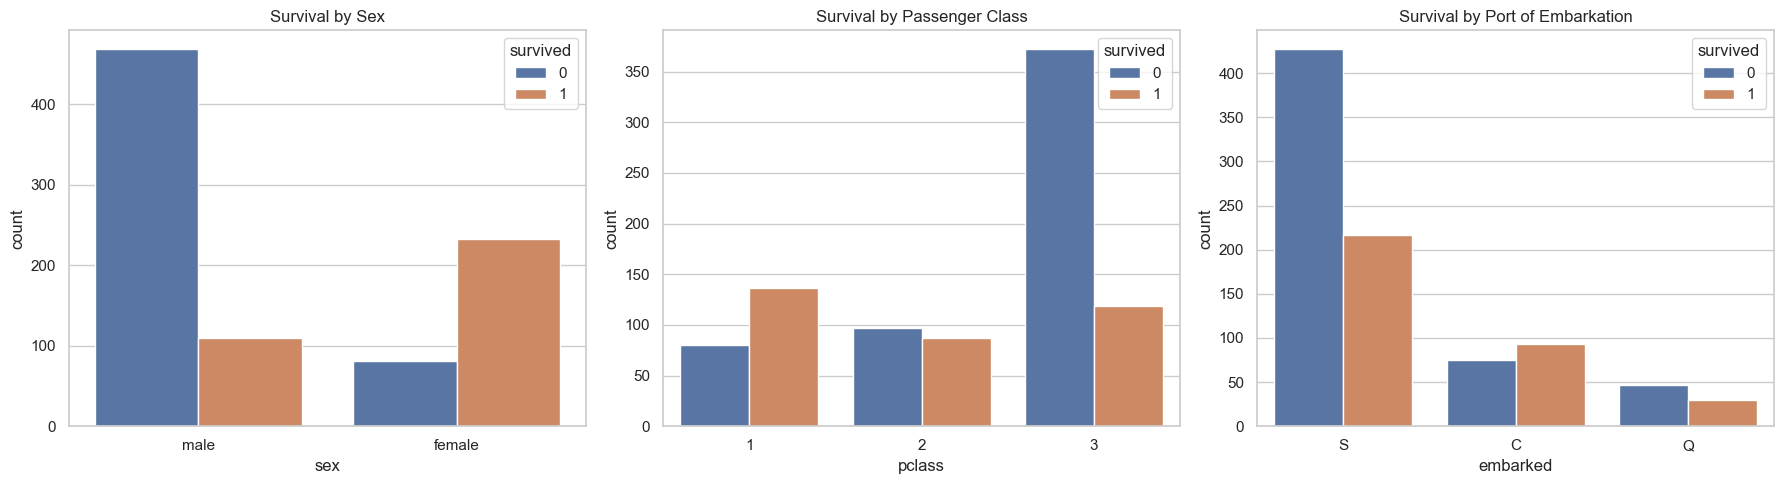

In [5]:
# Set a consistent style for plots
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Sex vs. Survival
sns.countplot(ax=axes[0], x='sex', hue='survived', data=df)
axes[0].set_title('Survival by Sex')

# Pclass vs. Survival
sns.countplot(ax=axes[1], x='pclass', hue='survived', data=df)
axes[1].set_title('Survival by Passenger Class')

# Embarked vs. Survival
sns.countplot(ax=axes[2], x='embarked', hue='survived', data=df)
axes[2].set_title('Survival by Port of Embarkation')

plt.tight_layout()
plt.show()

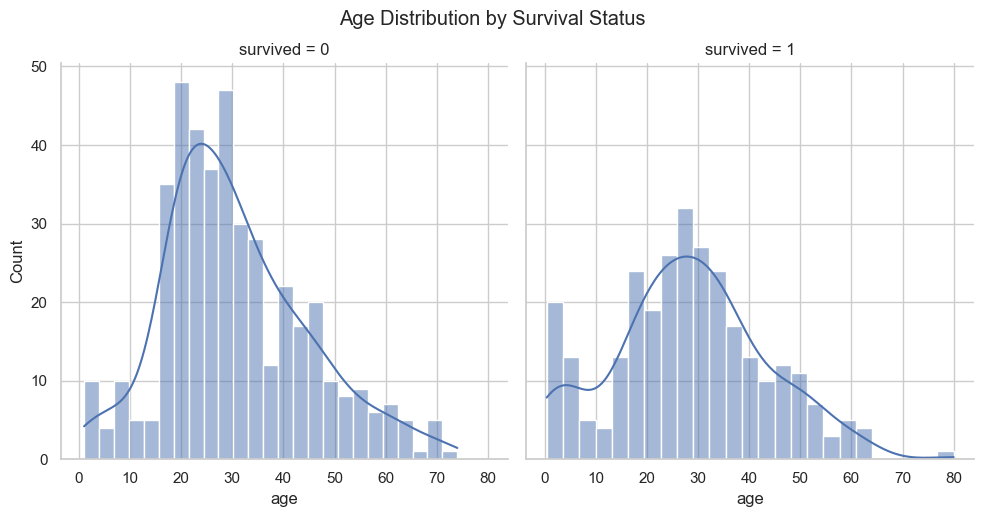

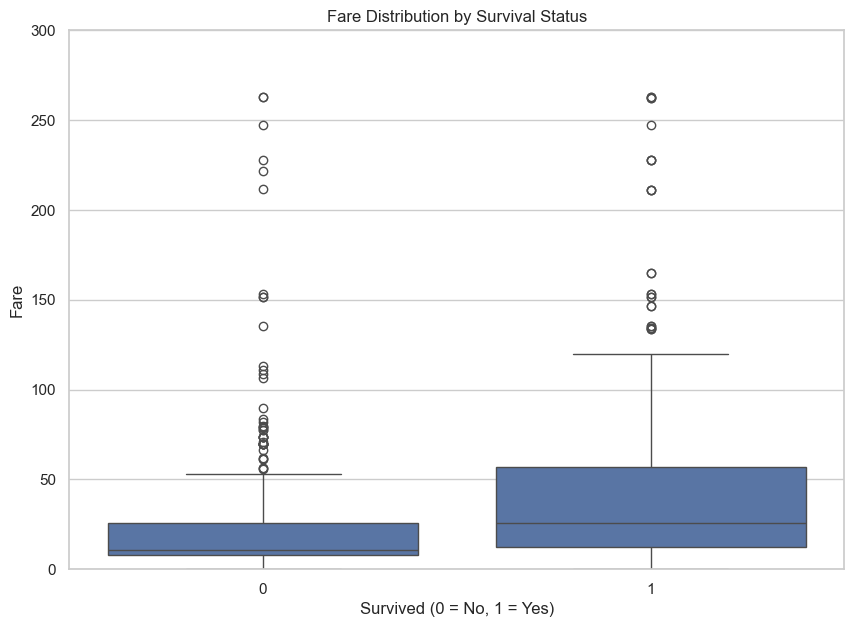

In [6]:
# Age distribution vs. Survival using a FacetGrid
g = sns.FacetGrid(df, col='survived', height=5)
g.map(sns.histplot, 'age', kde=True, bins=25)
g.fig.suptitle('Age Distribution by Survival Status', y=1.03)
plt.show()

# Fare vs. Survival using a Box Plot for outlier detection
plt.figure(figsize=(10, 7))
sns.boxplot(x='survived', y='fare', data=df)
plt.title('Fare Distribution by Survival Status')
plt.ylabel('Fare')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylim(0, 300) # Zoom in to see the box distributions clearly, cutting off extreme outliers
plt.show()

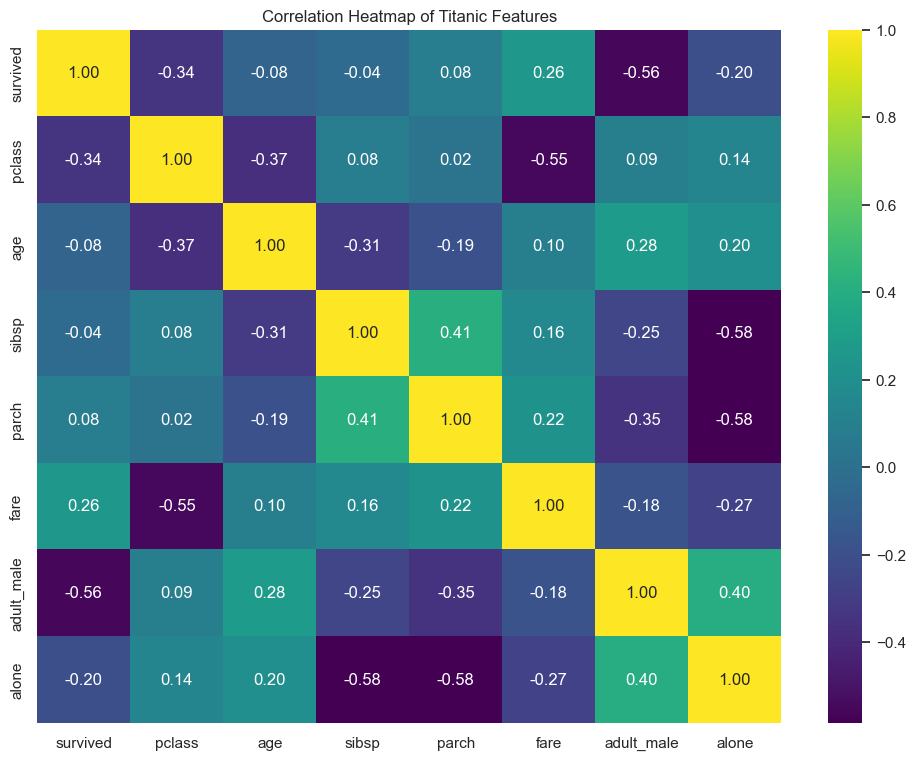

In [7]:
# Select only numerical columns for correlation matrix
# Note: boolean 'adult_male' and 'alone' are treated as 0/1 numerically
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap of Titanic Features')
plt.show()

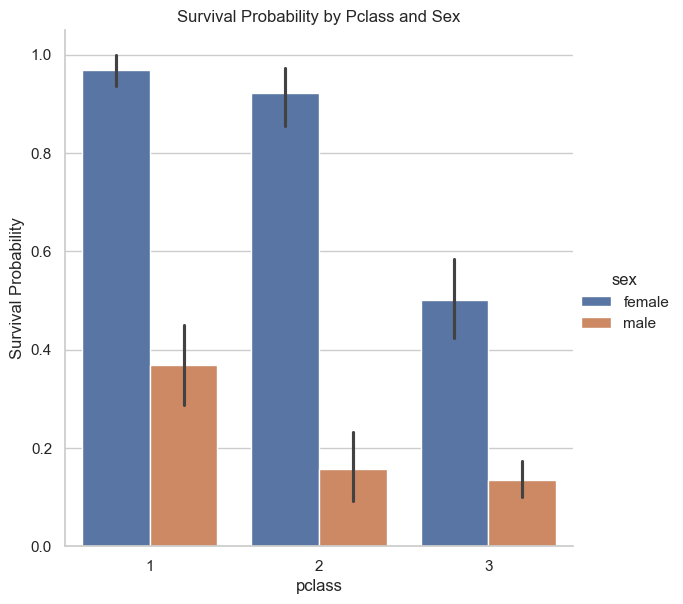

In [8]:
# Survival rate by Pclass and Sex
sns.catplot(x='pclass', y='survived', hue='sex', data=df, kind='bar', height=6)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Pclass and Sex')
plt.show()